## Direct Classification 



### Training Network

In [1]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import os

In [2]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [3]:

# For class weight

X_train = np.load("/content/drive/MyDrive/FYP/Direct Binary Classification/X_train_3D_Direct_BinaryClass.npy")

X_test = np.load("/content/drive/MyDrive/FYP/Direct Binary Classification/X_test_3D_Direct_BinaryClass.npy")

y_train = np.load("/content/drive/MyDrive/FYP/Direct Binary Classification/y_train_3D_Direct_BinaryClass.npy")

y_test  = np.load("/content/drive/MyDrive/FYP/Direct Binary Classification/y_test_3D_Direct_BinaryClass.npy")

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((888, 128, 128, 64, 1), (222, 128, 128, 64, 1), (888,), (222,))

In [ ]:
# # For UnderSampling

# X_train = np.load("/content/drive/MyDrive/FYP/Dataset/X_train_3D_Direct_BinaryClass.npy")

# #X_test = np.load("/content/drive/MyDrive/FYP/Dataset/X_test_3D_Direct_BinaryClass.npy")

# y_train = np.load("/content/drive/MyDrive/FYP/Dataset/y_train_3D_Direct_BinaryClass.npy")

# #y_test  = np.load("/content/drive/MyDrive/FYP/Dataset/y_test_3D_Direct_BinaryClass.npy")

# X_train.shape,X_test.shape,y_train.shape,y_test.shape

((406, 128, 128, 64, 1), (222, 128, 128, 64, 1), (406,), (222,))

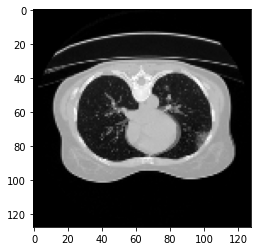

In [ ]:
plt.imshow(X_train[29][:,:,28,0],cmap='gray')

In [4]:
import tensorflow as tf

from tensorflow import keras

INPUT_shape = (128,128,64,1)

inputs = keras.layers.Input(shape=INPUT_shape)

# cov1 = keras.layers.Conv3D(filters=32, kernel_size=3, activation="relu")(inputs)
cov2 = keras.layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
pool2 = keras.layers.MaxPool3D(pool_size=2)(cov2)
norm2 = keras.layers.BatchNormalization()(pool2)
drop2 = keras.layers.Dropout(0.4)(norm2)

cov3 = keras.layers.Conv3D(filters=128, kernel_size=3, activation="relu")(drop2)
pool3 = keras.layers.MaxPool3D(pool_size=2)(cov3)
norm3 = keras.layers.BatchNormalization()(pool3)
drop3 = keras.layers.Dropout(0.4)(norm3)

cov4 = keras.layers.Conv3D(filters=256, kernel_size=3, activation="relu")(drop3)
pool4 = keras.layers.MaxPool3D(pool_size=2)(cov4)
norm4 = keras.layers.BatchNormalization()(pool4)
drop4 = keras.layers.Dropout(0.4)(norm4)

cov5 = keras.layers.Conv3D(filters=512, kernel_size=3, activation="relu")(drop4)
pool5 = keras.layers.MaxPool3D(pool_size=2)(cov5)
norm5 = keras.layers.BatchNormalization()(pool5)
drop5 = keras.layers.Dropout(0.4)(norm5)

pool6 = keras.layers.GlobalMaxPooling3D()(drop5)

flat6 = keras.layers.Flatten()(pool6)

hidden_1 = keras.layers.Dense(units=1024, activation="relu")(flat6)
drop_1 = keras.layers.Dropout(0.4)(hidden_1)

hidden_2 = keras.layers.Dense(units=512, activation="relu")(drop_1)
drop_2 = keras.layers.Dropout(0.4)(hidden_2)

outputs = keras.layers.Dense(units=1, activation="sigmoid")(drop_2)
    
DirBinary_model = keras.Model(inputs, outputs)

In [6]:
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)


DirBinary_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="binary_crossentropy",
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3D_Direct_Binary_classification.h5", save_best_only=True
)
#early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=15)

In [ ]:
with tf.device('/device:GPU:0'):

  hist_1 = DirBinary_model.fit(  # 0:1 = 254:846
            X_train,
            y_train,
            batch_size=8,
            class_weight={0: 5,1: 4},
            epochs=100,
            shuffle=True,
            verbose=2,
            validation_split=0.2,
            #validation_data=(X_val,y_val),
            callbacks=[checkpoint_cb],
        )

Epoch 1/100
89/89 - 67s - loss: 8.9071 - accuracy: 0.6085 - val_loss: 0.5921 - val_accuracy: 0.7584
Epoch 2/100
89/89 - 46s - loss: 3.2753 - accuracy: 0.6577 - val_loss: 0.6477 - val_accuracy: 0.7584
Epoch 3/100
89/89 - 46s - loss: 2.8285 - accuracy: 0.7028 - val_loss: 0.7628 - val_accuracy: 0.7584
Epoch 4/100
89/89 - 46s - loss: 2.7055 - accuracy: 0.7225 - val_loss: 0.8455 - val_accuracy: 0.7584
Epoch 5/100
89/89 - 46s - loss: 2.5508 - accuracy: 0.7577 - val_loss: 0.7739 - val_accuracy: 0.7584
Epoch 6/100
89/89 - 46s - loss: 2.6205 - accuracy: 0.7394 - val_loss: 0.5426 - val_accuracy: 0.7584
Epoch 7/100
89/89 - 46s - loss: 2.5888 - accuracy: 0.7451 - val_loss: 0.5568 - val_accuracy: 0.7584
Epoch 8/100
89/89 - 46s - loss: 2.4778 - accuracy: 0.7493 - val_loss: 0.5402 - val_accuracy: 0.7584
Epoch 9/100
89/89 - 46s - loss: 2.4797 - accuracy: 0.7366 - val_loss: 0.5219 - val_accuracy: 0.7584
Epoch 10/100
89/89 - 46s - loss: 2.3757 - accuracy: 0.7577 - val_loss: 0.6108 - val_accuracy: 0.7584

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((888, 128, 128, 64, 1), (888,), (222, 128, 128, 64, 1), (222,))

### Normal

In [ ]:
DirBinary_model.load_weights('/content/3D_Direct_Binary_classification.h5')
loss, accuracy = DirBinary_model.evaluate(X_test, y_test, verbose=0,batch_size=5)
loss, accuracy

(0.33373844623565674, 0.8423423171043396)

13 28 7 174
              precision    recall  f1-score   support

           0       0.65      0.32      0.43        41
           1       0.86      0.96      0.91       181

    accuracy                           0.84       222
   macro avg       0.76      0.64      0.67       222
weighted avg       0.82      0.84      0.82       222



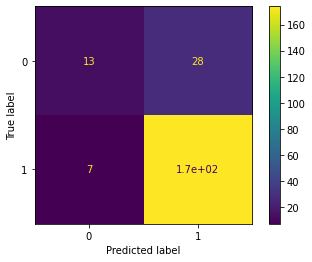

In [ ]:
predict = DirBinary_model.predict(X_test,batch_size=5)
pred = np.where(predict > 0.5,1,0)
pred = np.squeeze(pred)
tn, fp, fn, tp= confusion_matrix(y_test,pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_test,np.squeeze(pred)))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred),display_labels=[0,1]).plot()

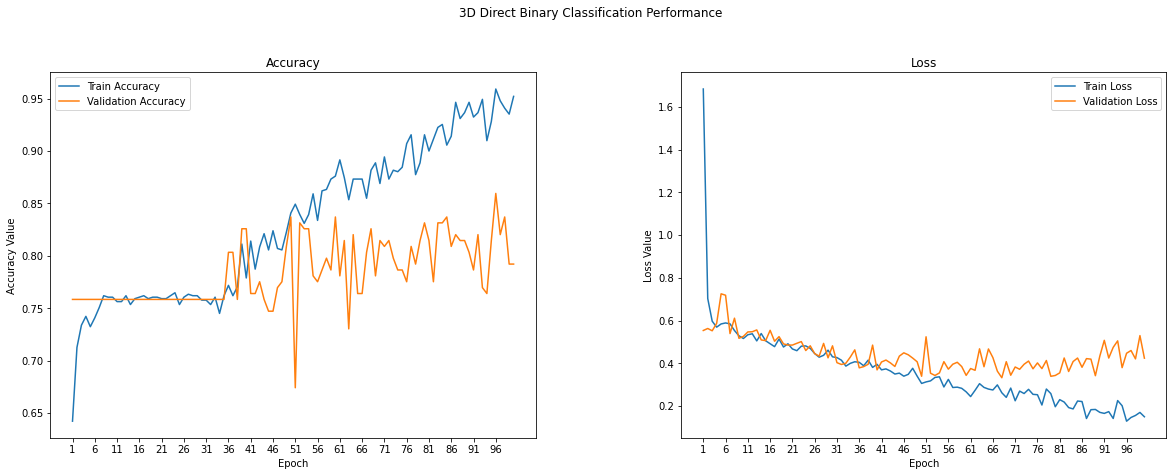

In [ ]:
f, (ax1, ax2,) = plt.subplots(1, 2, figsize=(20, 7),)
t = f.suptitle('3D Direct Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(hist_1.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, hist_1.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, hist_1.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, hist_1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist_1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

### Class Weight to make balanced and test data is 222
###    class_weight={0: 5,1: 4},



In [ ]:
DirBinary_model.load_weights('/content/3D_Direct_Binary_classification.h5')
loss, accuracy = DirBinary_model.evaluate(X_test, y_test, verbose=0,batch_size=5)
loss, accuracy

(0.3504061698913574, 0.8513513803482056)

25 16 17 164
              precision    recall  f1-score   support

           0       0.60      0.61      0.60        41
           1       0.91      0.91      0.91       181

    accuracy                           0.85       222
   macro avg       0.75      0.76      0.76       222
weighted avg       0.85      0.85      0.85       222



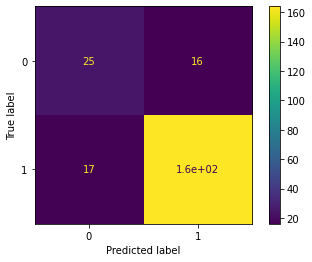

In [ ]:
predict = DirBinary_model.predict(X_test,batch_size=5)
pred = np.where(predict > 0.5,1,0)
pred = np.squeeze(pred)
tn, fp, fn, tp= confusion_matrix(y_test,pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_test,np.squeeze(pred)))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred),display_labels=[0,1]).plot()

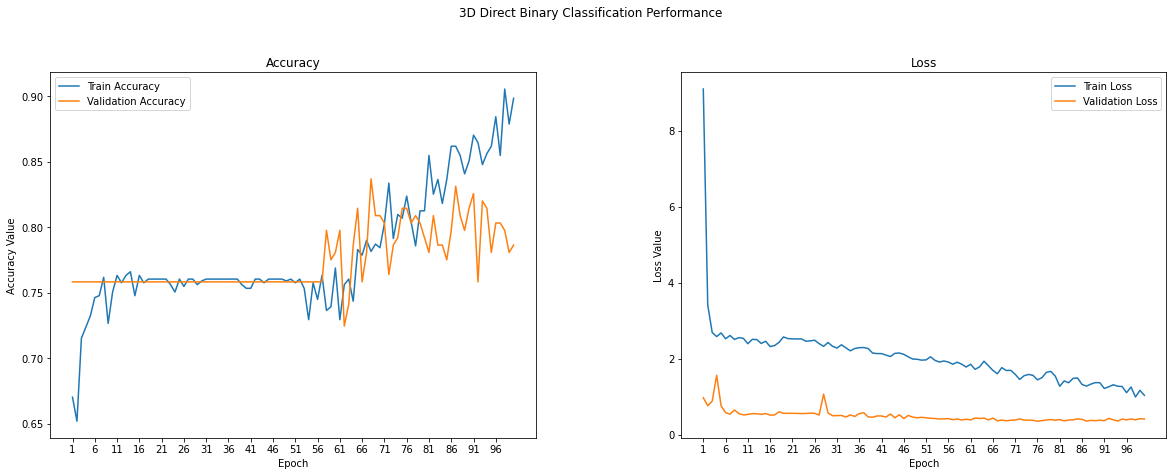

In [ ]:
f, (ax1, ax2,) = plt.subplots(1, 2, figsize=(20, 7),)
t = f.suptitle('3D Direct Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(hist_1.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, hist_1.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, hist_1.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, hist_1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist_1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

### Class Weight to make balanced and test data is 222
###  class_weight={0: 6,1: 5},

In [ ]:
DirBinary_model.load_weights('/content/3D_Direct_Binary_classification.h5')
loss, accuracy = DirBinary_model.evaluate(X_test, y_test, verbose=0,batch_size=5)
loss, accuracy

(0.3672085106372833, 0.8288288116455078)

22 19 19 162
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        41
           1       0.90      0.90      0.90       181

    accuracy                           0.83       222
   macro avg       0.72      0.72      0.72       222
weighted avg       0.83      0.83      0.83       222



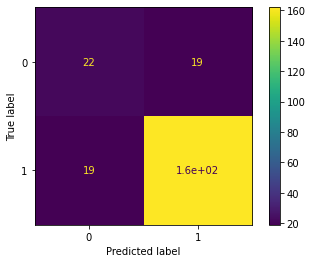

In [ ]:
predict = DirBinary_model.predict(X_test,batch_size=5)
pred = np.where(predict > 0.5,1,0)
pred = np.squeeze(pred)
tn, fp, fn, tp= confusion_matrix(y_test,pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_test,np.squeeze(pred)))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred),display_labels=[0,1]).plot()

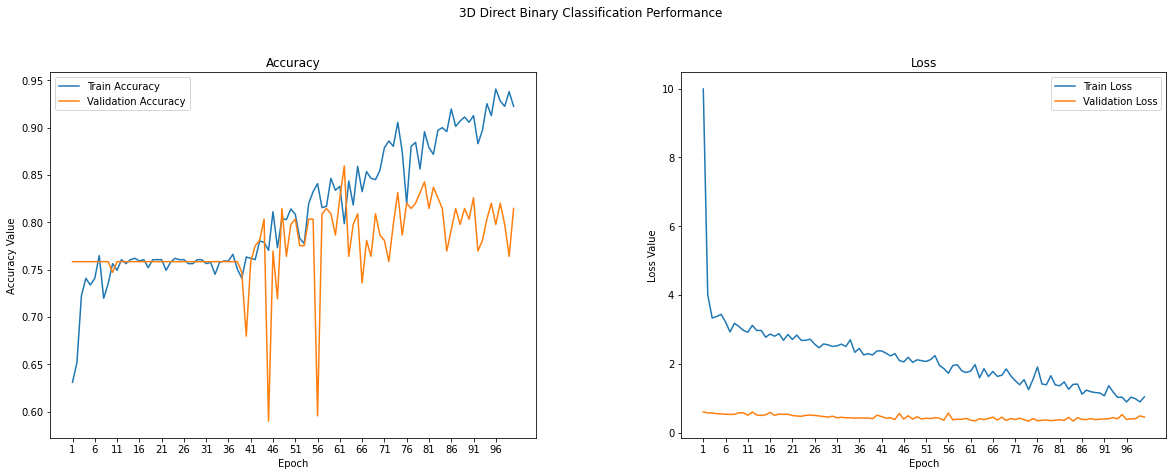

In [ ]:
f, (ax1, ax2,) = plt.subplots(1, 2, figsize=(20, 7),)
t = f.suptitle('3D Direct Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(hist_1.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, hist_1.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, hist_1.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, hist_1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist_1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

### UnderSampling and test data is 222

In [ ]:
DirBinary_model.load_weights('/content/3D_Direct_Binary_classification.h5')
loss, accuracy = DirBinary_model.evaluate(X_test, y_test, verbose=0,batch_size=5)
loss, accuracy

(0.4900418221950531, 0.7702702879905701)

In [ ]:
predict = DirBinary_model.predict(X_test,batch_size=5)
pred = np.where(predict > 0.5,1,0)
pred = np.squeeze(pred)
tn, fp, fn, tp= confusion_matrix(y_test,pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_test,np.squeeze(pred)))

39 2 49 132
              precision    recall  f1-score   support

           0       0.44      0.95      0.60        41
           1       0.99      0.73      0.84       181

    accuracy                           0.77       222
   macro avg       0.71      0.84      0.72       222
weighted avg       0.88      0.77      0.79       222



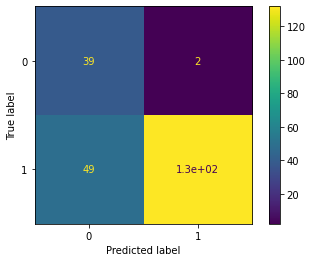

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test,pred),display_labels=[0,1]).plot()

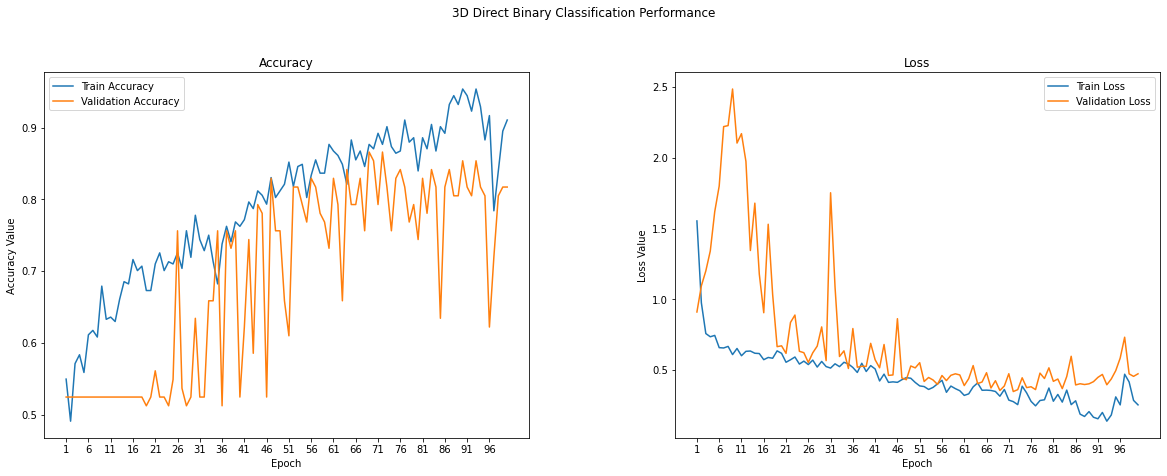

In [ ]:
f, (ax1, ax2,) = plt.subplots(1, 2, figsize=(20, 7),)
t = f.suptitle('3D Direct Binary Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(hist_1.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, hist_1.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, hist_1.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, hist_1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist_1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## 3D CT Lung Segmentation Binary Classification 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X_train = np.load("/content/drive/MyDrive/FYP/LungSeg_Classification/For Binary Classicifaction/X_train_3D_LungSeg_BinaryClass.npy")

X_test = np.load("/content/drive/MyDrive/FYP/LungSeg_Classification/For Binary Classicifaction/X_test_3D_LungSeg_BinaryClass.npy")

y_train = np.load("/content/drive/MyDrive/FYP/LungSeg_Classification/For Binary Classicifaction/y_train_3D_LungSeg_BinaryClass.npy")

y_test  = np.load("/content/drive/MyDrive/FYP/LungSeg_Classification/For Binary Classicifaction/y_test_3D_LungSeg_BinaryClass.npy")

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((888, 128, 128, 64, 1), (222, 128, 128, 64, 1), (888,), (222,))

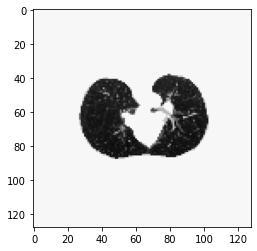

In [ ]:
plt.imshow(X_train[29][:,:,37,0],cmap='gray')

In [ ]:
INPUT_shape = (128,128,64,1)

inputs = keras.layers.Input(shape=INPUT_shape)

# cov1 = keras.layers.Conv3D(filters=32, kernel_size=3, activation="relu")(inputs)
cov2 = keras.layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
pool2 = keras.layers.MaxPool3D(pool_size=2)(cov2)
norm2 = keras.layers.BatchNormalization()(pool2)
drop2 = keras.layers.Dropout(0.4)(norm2)

cov3 = keras.layers.Conv3D(filters=128, kernel_size=3, activation="relu")(drop2)
pool3 = keras.layers.MaxPool3D(pool_size=2)(cov3)
norm3 = keras.layers.BatchNormalization()(pool3)
drop3 = keras.layers.Dropout(0.4)(norm3)

cov4 = keras.layers.Conv3D(filters=256, kernel_size=3, activation="relu")(drop3)
pool4 = keras.layers.MaxPool3D(pool_size=2)(cov4)
norm4 = keras.layers.BatchNormalization()(pool4)
drop4 = keras.layers.Dropout(0.4)(norm4)

cov5 = keras.layers.Conv3D(filters=512, kernel_size=3, activation="relu")(drop4)
pool5 = keras.layers.MaxPool3D(pool_size=2)(cov5)
norm5 = keras.layers.BatchNormalization()(pool5)
drop5 = keras.layers.Dropout(0.4)(norm5)

pool6 = keras.layers.GlobalMaxPooling3D()(drop5)

flat6 = keras.layers.Flatten()(pool6)

hidden_1 = keras.layers.Dense(units=1024, activation="relu")(flat6)
drop_1 = keras.layers.Dropout(0.4)(hidden_1)

hidden_2 = keras.layers.Dense(units=512, activation="relu")(drop_1)
drop_2 = keras.layers.Dropout(0.4)(hidden_2)

outputs = keras.layers.Dense(units=1, activation="sigmoid")(drop_2)

lungSegBinary__model = keras.Model(inputs, outputs)

In [ ]:
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)


lungSegBinary__model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="binary_crossentropy",
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3D_LungSeg_Binary_Classification.h5", save_best_only=True
)

In [ ]:
with tf.device('/device:GPU:0'):

  hist_2 = lungSegBinary__model.fit(
            X_train,
            y_train,
            batch_size=8,
            epochs=100,
            shuffle=True,
            verbose=2,
            class_weight={0: 3,1: 2},
            validation_split=0.2,
            #validation_data=(X_val,y_val),
            callbacks=[checkpoint_cb],
        )

Epoch 1/100
89/89 - 48s - loss: 4.2683 - accuracy: 0.6211 - val_loss: 0.9854 - val_accuracy: 0.7584
Epoch 2/100
89/89 - 46s - loss: 1.9205 - accuracy: 0.6451 - val_loss: 1.5595 - val_accuracy: 0.7584
Epoch 3/100
89/89 - 46s - loss: 1.6177 - accuracy: 0.6380 - val_loss: 2.2565 - val_accuracy: 0.7584
Epoch 4/100
89/89 - 46s - loss: 1.4439 - accuracy: 0.7014 - val_loss: 2.9688 - val_accuracy: 0.7584
Epoch 5/100
89/89 - 46s - loss: 1.4561 - accuracy: 0.6859 - val_loss: 2.8387 - val_accuracy: 0.7584
Epoch 6/100
89/89 - 46s - loss: 1.4616 - accuracy: 0.7268 - val_loss: 2.9022 - val_accuracy: 0.7584
Epoch 7/100
89/89 - 46s - loss: 1.3882 - accuracy: 0.7352 - val_loss: 0.5402 - val_accuracy: 0.7584
Epoch 8/100
89/89 - 46s - loss: 1.4312 - accuracy: 0.7380 - val_loss: 1.3239 - val_accuracy: 0.7584
Epoch 9/100
89/89 - 46s - loss: 1.5230 - accuracy: 0.7437 - val_loss: 0.5595 - val_accuracy: 0.7584
Epoch 10/100
89/89 - 46s - loss: 1.3974 - accuracy: 0.7479 - val_loss: 0.6451 - val_accuracy: 0.7360

### class_weight={0: 2,1: 1},

In [ ]:
lungSegBinary__model.load_weights('/content/3D_LungSeg_Binary_Classification.h5')
loss, accuracy = lungSegBinary__model.evaluate(X_test, y_test, verbose=0,batch_size=10)
loss, accuracy 

(0.4296973943710327, 0.8288288116455078)

3 38 0 181
              precision    recall  f1-score   support

           0       1.00      0.07      0.14        41
           1       0.83      1.00      0.91       181

    accuracy                           0.83       222
   macro avg       0.91      0.54      0.52       222
weighted avg       0.86      0.83      0.76       222



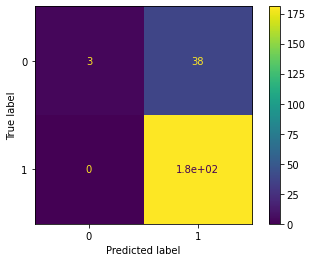

In [ ]:
predict = lungSegBinary__model.predict(X_test,batch_size=5)
pred = np.where(predict > 0.5,1,0)
pred = np.squeeze(pred)
tn, fp, fn, tp= confusion_matrix(y_test,pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_test,np.squeeze(pred)))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred),display_labels=[0,1]).plot()

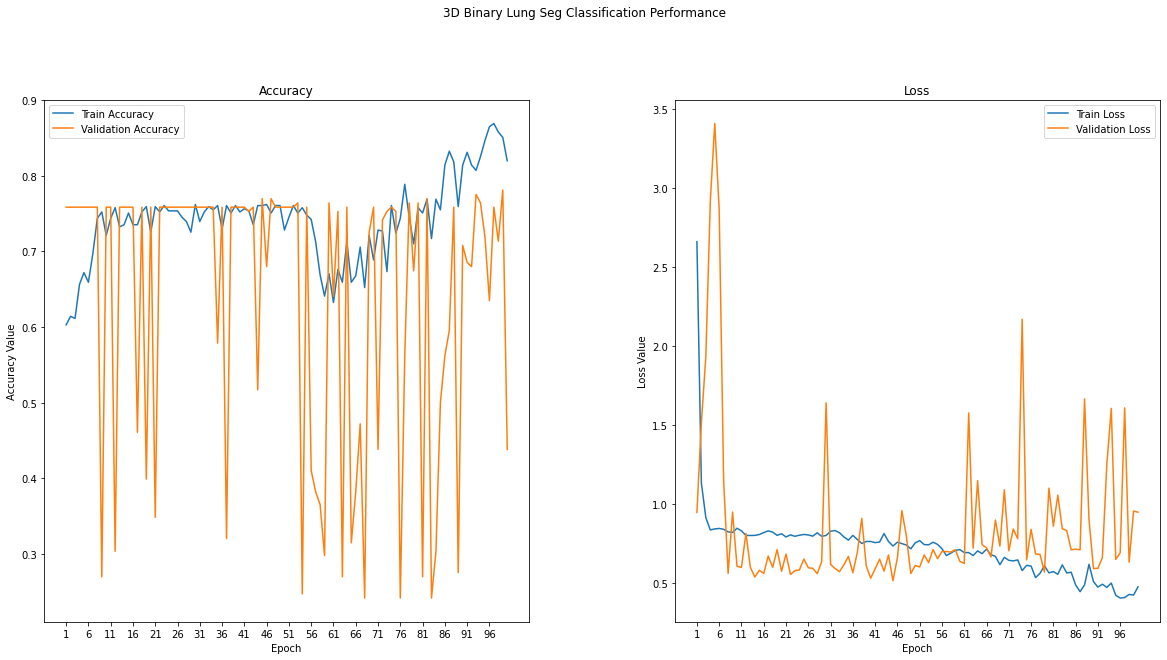

In [ ]:
f, (ax1, ax2,) = plt.subplots(1, 2, figsize=(20, 10),)
t = f.suptitle('3D Binary Lung Seg Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(hist_2.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, hist_2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, hist_2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, hist_2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist_2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

### class_weight={0: 3,1: 2},

In [ ]:
lungSegBinary__model.load_weights('/content/3D_LungSeg_Binary_Classification.h5')
loss, accuracy = lungSegBinary__model.evaluate(X_test, y_test, verbose=0,batch_size=10)
loss, accuracy 

(0.31044289469718933, 0.8423423171043396)

23 18 17 164
              precision    recall  f1-score   support

           0       0.57      0.56      0.57        41
           1       0.90      0.91      0.90       181

    accuracy                           0.84       222
   macro avg       0.74      0.73      0.74       222
weighted avg       0.84      0.84      0.84       222



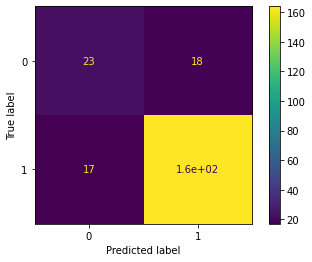

In [ ]:
predict = lungSegBinary__model.predict(X_test,batch_size=5)
pred = np.where(predict > 0.5,1,0)
pred = np.squeeze(pred)
tn, fp, fn, tp= confusion_matrix(y_test,pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_test,np.squeeze(pred)))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred),display_labels=[0,1]).plot()

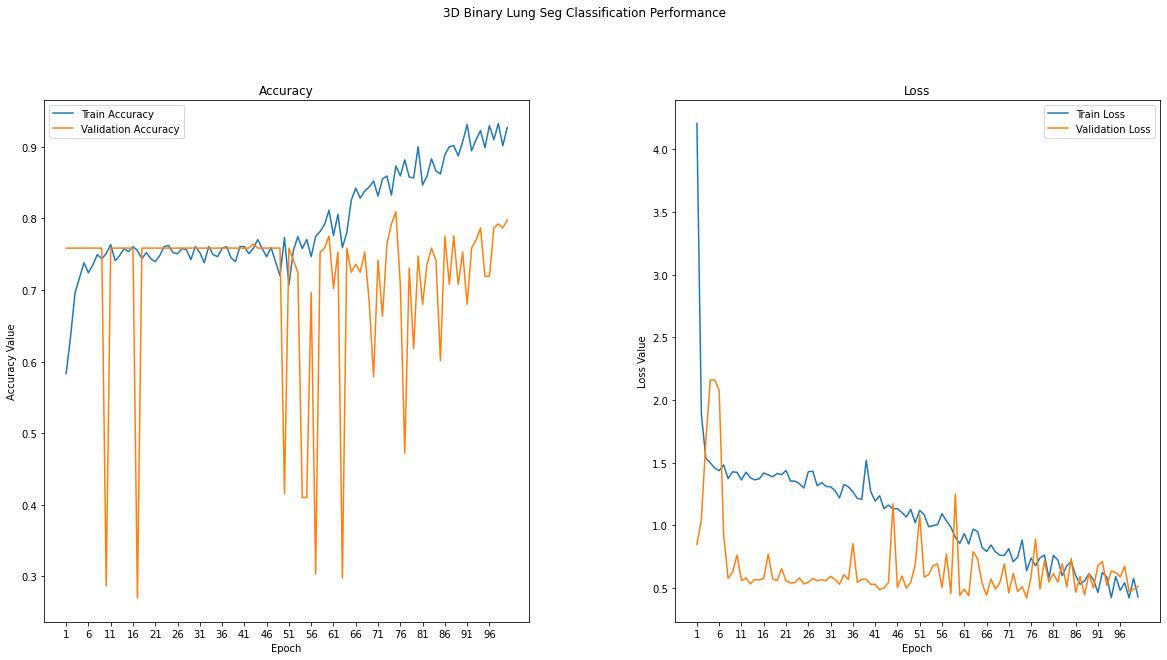

In [ ]:
f, (ax1, ax2,) = plt.subplots(1, 2, figsize=(20, 10),)
t = f.suptitle('3D Binary Lung Seg Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(hist_2.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, hist_2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, hist_2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, hist_2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist_2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

### class_weight={0: 4,1: 3},

In [ ]:
lungSegBinary__model.load_weights('/content/3D_LungSeg_Binary_Classification.h5')
loss, accuracy = lungSegBinary__model.evaluate(X_test, y_test, verbose=0,batch_size=10)
loss, accuracy 

(0.45772746205329895, 0.815315306186676)

0 41 0 181
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.82      1.00      0.90       181

    accuracy                           0.82       222
   macro avg       0.41      0.50      0.45       222
weighted avg       0.66      0.82      0.73       222



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


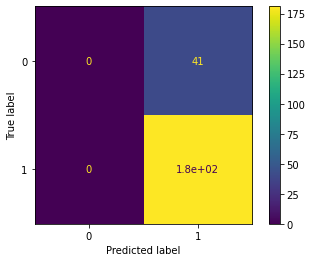

In [ ]:
predict = lungSegBinary__model.predict(X_test,batch_size=5)
pred = np.where(predict > 0.5,1,0)
pred = np.squeeze(pred)
tn, fp, fn, tp= confusion_matrix(y_test,pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_test,np.squeeze(pred)))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred),display_labels=[0,1]).plot()

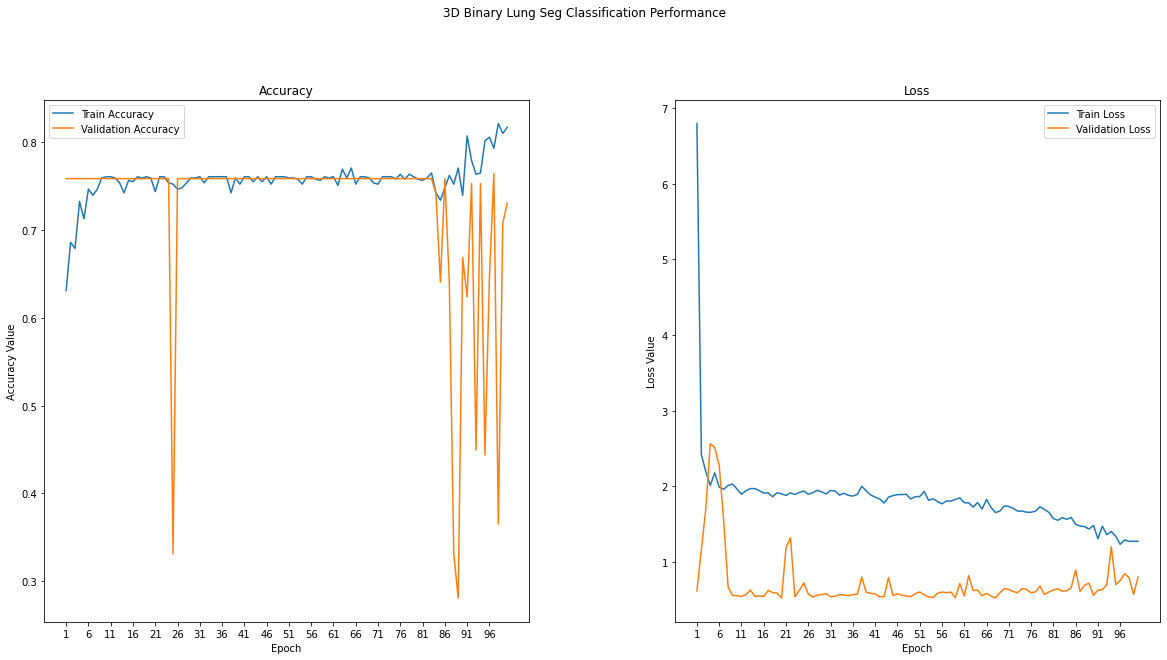

In [ ]:
f, (ax1, ax2,) = plt.subplots(1, 2, figsize=(20, 10),)
t = f.suptitle('3D Binary Lung Seg Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(hist_2.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, hist_2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, hist_2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, hist_2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist_2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

### No CLass_weight

In [ ]:
lungSegBinary__model.load_weights('/content/3D_LungSeg_Binary_Classification.h5')
loss, accuracy = lungSegBinary__model.evaluate(X_test, y_test, verbose=0,batch_size=10)
loss, accuracy 

(0.42149460315704346, 0.815315306186676)

0 41 0 181
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.82      1.00      0.90       181

    accuracy                           0.82       222
   macro avg       0.41      0.50      0.45       222
weighted avg       0.66      0.82      0.73       222



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


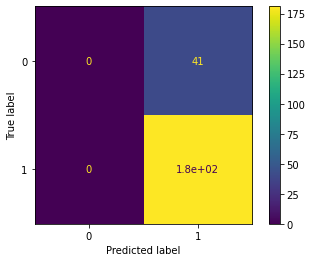

In [ ]:
predict = lungSegBinary__model.predict(X_test,batch_size=5)
pred = np.where(predict > 0.5,1,0)
pred = np.squeeze(pred)
tn, fp, fn, tp= confusion_matrix(y_test,pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_test,np.squeeze(pred)))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred),display_labels=[0,1]).plot()

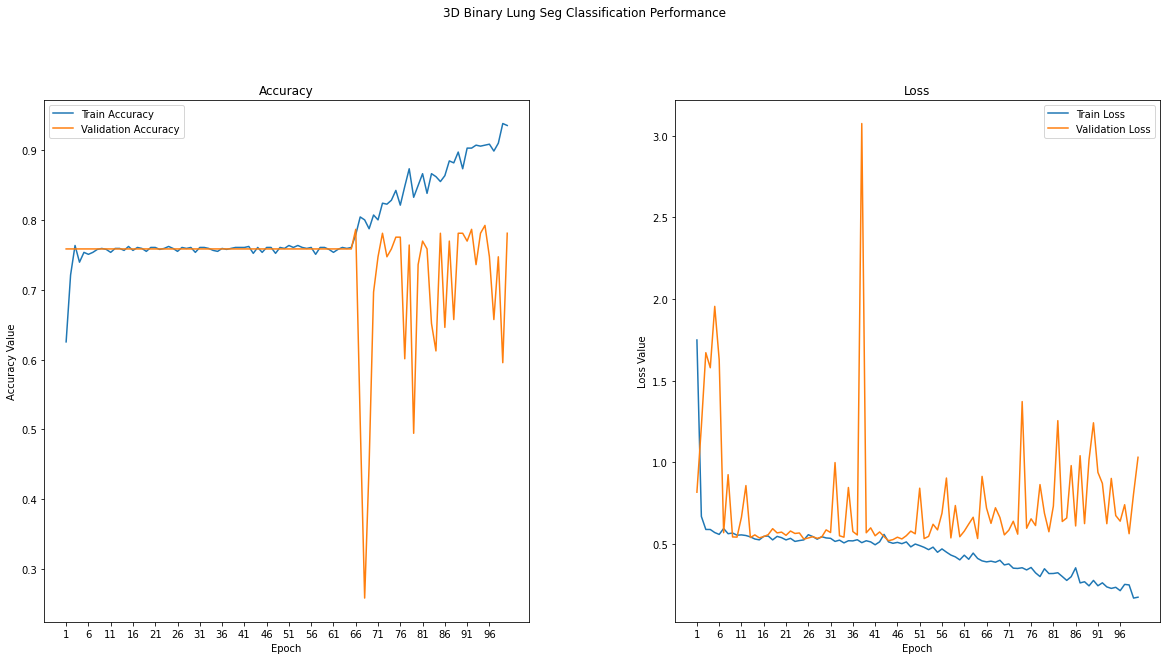

In [ ]:
f, (ax1, ax2,) = plt.subplots(1, 2, figsize=(20, 10),)
t = f.suptitle('3D Binary Lung Seg Classification Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(hist_2.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, hist_2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, hist_2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, hist_2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist_2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")